# Объединение таблиц с разными типами соединений

## Подсчет пропущенных строк с левым соединением

База данных фильмов поддерживается волонтерами, которые выходят в мир, собирают данные и вводят их в базу данных. Сюда входят финансовые данные, такие как бюджет фильма и доходы. Если вы хотите узнать, в каких фильмах все еще отсутствуют данные, вы можете использовать левое соединение, чтобы идентифицировать их. Потренируйтесь в использовании левого соединения, объединив таблицу `«movies»` и таблицу `«financials»`.

Для вас загружены таблицы `movies` и `financials`.

In [2]:
# Предполагая, что ваш блокнот Jupyter находится в папке exercises
# Вы хотите получить доступ к файлу movies.p в папке datasets

import os
import pickle
import pandas as pd

# Получаем текущий каталог
current_directory = os.getcwd()

# Переходим в каталог с данными
datasets_directory = os.path.join(current_directory, 'datasets')

# Проверяем, существует ли файл в папке с данными
file_path = os.path.join(datasets_directory, 'movies.p')

if os.path.exists(file_path):
    # Файл существует, поэтому открываем его
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    # Работаем с объектом 'data' по необходимости
    print("Файл успешно открыт!")
else:
    print("Файл не найден.")
movies = data

Файл успешно открыт!


In [3]:
# Предполагая, что ваш блокнот Jupyter находится в папке exercises
# Вы хотите получить доступ к файлу financials.p в папке datasets

# Получаем текущий каталог
current_directory = os.getcwd()

# Переходим в каталог с данными
datasets_directory = os.path.join(current_directory, 'datasets')

# Проверяем, существует ли файл в папке с данными
file_path = os.path.join(datasets_directory, 'financials.p')

if os.path.exists(file_path):
    # Файл существует, поэтому открываем его
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    # Работаем с объектом 'data' по необходимости
    print("Файл успешно открыт!")
else:
    print("Файл не найден.")
financials = data

Файл успешно открыт!


### Инструкции 1/2

Объедините таблицу `«movies»` как левую таблицу с таблицей `«financials»` с помощью левого соединения и сохраните результат в `«movies_financials»`.

In [4]:
# Объединить movies и financials с левым соединением
movies_financials = movies.merge(financials, how='left', on='id')

### Инструкция 2/3

Подсчитайте количество строк в `«movies_financials»` с нулевым значением в столбце `budget`.

In [5]:
# Подсчитайте количество пропущенных строк в столбце бюджета
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Вывести количество фильмов, в которых отсутствуют финансовые показатели
print(number_of_missing_fin)

1574


## Пополнение набора данных
Установка `how='left'` с помощью метода `.merge()` является полезным методом для обогащения или расширения набора данных дополнительной информацией из другой таблицы. В этом упражнении вы начнете с образца данных фильма из серии фильмов «`История игрушек»`. Ваша цель — обогатить эти данные, добавив маркетинговый слоган для каждого фильма. Вы сравните результаты левого соединения и внутреннего соединения.

DataFrame `toy_story` содержит фильмы `«История игрушек»`. DataFrame `toy_story` и `taglines` были загружены для вас.

In [6]:
# Создайте DataFrame с предоставленными данными
data = {
    'id': [10193, 863, 862],
    'title': ['Toy Story 3', 'Toy Story 2', 'Toy Story'],
    'popularity': [59.995, 73.575, 73.64],
    'release_date': ['2010-06-16', '1999-10-30', '1995-10-30']
}

toy_story = pd.DataFrame(data)

# Сохраняем DataFrame как файл CSV
toy_story.to_csv('toy_story.csv', index=False)

In [7]:
# Предполагая, что ваш блокнот Jupyter находится в папке exercises
# Вы хотите получить доступ к файлу taglines.p в папке datasets

# Получаем текущий каталог
current_directory = os.getcwd()

# Переходим в каталог с данными
datasets_directory = os.path.join(current_directory, 'datasets')

# Проверяем, существует ли файл в папке с данными
file_path = os.path.join(datasets_directory, 'taglines.p')

if os.path.exists(file_path):
    # Файл существует, поэтому открываем его
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    # Работаем с объектом 'data' по необходимости
    print("Файл успешно открыт!")
else:
    print("Файл не найден.")
taglines = data

Файл успешно открыт!


### Инструкции 1/2

Объедините `toy_story` и `taglines` в столбце `id` с помощью левого соединения и сохраните результат как `toystory_tag`.

In [8]:
# Объединяем таблицы toy_story и taglines левым соединением
toystory_tag = toy_story.merge(taglines,on='id',how='left')

# Распечатываем строки и форму toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
2    862    Toy Story      73.640   1995-10-30                       NaN
(3, 5)


### Инструкция 2/2

Используя `«toy_story»` в качестве левой таблицы, объедините с ней `«taglines»` в столбце `«id»` с помощью внутреннего соединения и сохраните как `«toystory_tag»`.

In [9]:
# Объединяем таблицы toy_story и taglines с помощью внутреннего соединения
toystory_tag = toy_story.merge(taglines,on='id')

# Распечатываем строки и форму toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
(2, 5)


## Соединение справа, чтобы найти уникальные фильмы
Большинство вышедших в последнее время высокобюджетных научно-фантастических фильмов также можно отнести к категории боевиков. Вам дана таблица научно-фантастических фильмов под названием `«scifi_movies»` и еще одна таблица боевиков под названием `«action_movies»`. Ваша цель — выяснить, какие фильмы считаются только научно-фантастическими. Получив эту таблицу, вы можете объединить таблицу фильмов, чтобы увидеть названия фильмов. Поскольку это упражнение связано с научно-фантастическими фильмами, используйте правое соединение в качестве супергеройской силы для решения этой задачи.

Таблицы `«movies»`, `«scifi_movies»` и `«action_movies»` уже загружены.

In [10]:
# Предполагая, что ваш блокнот Jupyter находится в папке exercises
# Вы хотите получить доступ к файлу movie_to_genres.p в папке datasets

# Получаем текущий каталог
current_directory = os.getcwd()

# Переходим в каталог с данными
datasets_directory = os.path.join(current_directory, 'datasets')

# Проверяем, существует ли файл в папке с данными
file_path = os.path.join(datasets_directory, 'movie_to_genres.p')

if os.path.exists(file_path):
    # Файл существует, поэтому открываем его
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    # Работаем с объектом 'data' по необходимости
    print("Файл успешно открыт!")
else:
    print("Файл не найден.")
movie_to_genres = data

Файл успешно открыт!


In [11]:
action_movies = pd.read_csv('datasets/action_movies.csv', parse_dates=True, index_col=[0])
scifi_movies = pd.read_csv('datasets/scifi_movies.csv', parse_dates=True, index_col=[0])

###Инструкция 1/4

Объедините таблицы `action_movies` и `scifi_movies` с помощью правого соединения по `movie_id`. Сохраните результат как `action_scifi`.

In [11]:
# # Объединить action_movies с scifi_movies с помощью правого соединения
action_scifi = action_movies.merge(scifi_movies, how='right', on='movie_id')


###Инструкция 2/4

Обновите слияние, добавив суффиксы, где `_act` и `_sci` — это суффиксы для левой и правой таблиц соответственно.

In [12]:
# Объединить action_movies с scifi_movies с помощью правого соединения
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',suffixes=['_act','_sci'])

# Распечатайте первые несколько строк action_scifi, чтобы увидеть структуру
print(action_scifi.head())

         genre_act        genre_sci
movie_id                           
11          Action  Science Fiction
18          Action  Science Fiction
19             NaN  Science Fiction
38             NaN  Science Fiction
62             NaN  Science Fiction


###Инструкция 3/4

Из `action_scifi` выберите подмножество только тех строк, в которых столбец `genre_act` имеет значение null.

In [14]:
# Из action_scifi выберите только те строки, в которых столбец жанра_act имеет значение null.
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

###Инструкция 4/4

Объедините `«movies»` и `«scifi_only»`, используя столбец `«id»` в левой таблице и столбец `«movie_id»` в правой таблице с помощью внутреннего соединения.

In [15]:
# Объединяем таблицы Movies и scifi_only с помощью внутреннего соединения
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id')

# Распечатываем первые несколько строк и форму Movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date genre_act  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12       NaN   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23       NaN   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24       NaN   
3   8452                   The 6th Day   18.447479   2000-11-17       NaN   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19       NaN   

         genre_sci  
0  Science Fiction  
1  Science Fiction  
2  Science Fiction  
3  Science Fiction  
4  Science Fiction  
(258, 6)


## Популярные жанры с правым объединением
Какие жанры самых популярных фильмов? Чтобы ответить на этот вопрос, вам нужно объединить данные из таблиц `«movies»` и `«movie_to_genres»`. В таблице под названием `«pop_movies»` были выбраны 10 самых популярных фильмов в таблице фильмов. Чтобы убедиться, что вы анализируете все популярные фильмы, объедините их с таблицей `«movie_to_genres»`, используя правое соединение. Для завершения анализа подсчитайте количество различных жанров. Кроме того, две таблицы можно объединить по идентификатору фильма. Однако в `pop_movies` этот столбец называется `id`, а `вmovies_to_genres` `—movie_id`.

Таблицы `pop_movies` и `movie_to_genres` уже загружены.

In [16]:
pop_movies = pd.read_csv('datasets/pop_movies.csv')

### Инструкции

- Объедините `«movie_to_genres»` и `«pop_movies»`, используя правое соединение. Сохраните результаты как `«genres_movies»`.
- Сгруппируйте `genres_movies` по `genre` и подсчитайте количество значений `id`.

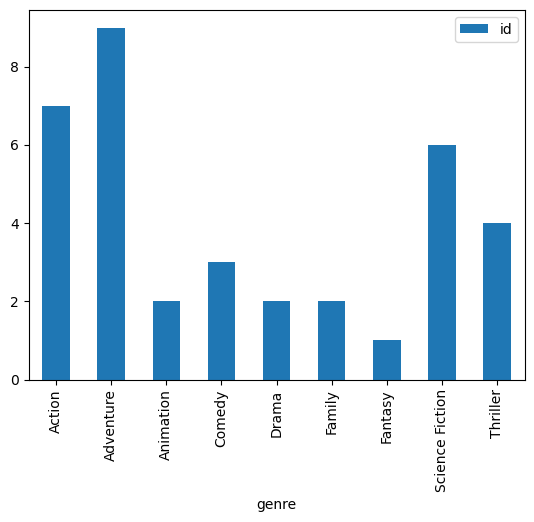

In [17]:
import matplotlib.pyplot as plt

# Используйте правое соединение, чтобы объединить таблицы movie_to_genres и pop_movies
genres_movies = movie_to_genres.merge(pop_movies, how='right', left_on='movie_id', right_on='id')

# Подсчитаем количество жанров
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Постройте гистограмму жанра_count
genre_count.plot(kind='bar')
plt.show()

## Использование внешнего соединения для выбора актеров
Одним из интересных аспектов использования внешнего соединения является то, что, поскольку оно возвращает все строки из обеих объединенных таблиц, а также значения NULL там, где они не совпадают, вы можете использовать его для поиска строк, которые не имеют совпадений в другой таблице. На пробу вам даны две таблицы со списком актеров двух популярных фильмов: `«Железный человек 1»` и `«Железный человек 2»`. Большинство актеров играли в обоих фильмах. Используйте внешнее соединение, чтобы найти актеров, которые не играли в обоих фильмах.

Таблица `«Железный человек 1»` называется `«iron_1_actors»`, а таблица `«Железный человек 2» — «iron_2_actors»`. Обе таблицы были загружены и распечатаны несколько строк, чтобы вы могли видеть структуру.

![tables](datasets/noJoin.png)

### Инструкции

- Сохраните в `iron_1_and_2` объединение таблиц `iron_1_actors` (слева) с `iron_2_actors` с `outer` объединением в столбце `id` и установите суффиксы на (`'_1','_2'`).
- Создайте индекс, который возвращает `«True»`, если `«name_1»` или `«name_2»` имеют значение null, и `«False»` в противном случае.

In [18]:
iron_1_actors = pd.read_csv('datasets/iron_1_actors.csv')
iron_2_actors = pd.read_csv('datasets/iron_2_actors.csv')

In [19]:
# Объединить Iron_1_actors с Iron_2_actors по идентификатору с внешним соединением, используя суффиксы
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                   how='outer',
                                   on='id',
                                   suffixes=['_1','_2'])

# Создайте индекс, который возвращает true, если name_1 или name_2 равны нулю
m = ((iron_1_and_2['name_1'].isnull()) |
     (iron_1_and_2['name_2'].isnull()))

# Распечатаем первые несколько строк Iron_1_and_2
print(iron_1_and_2[m].head())

                   character_1      id           name_1 character_2 name_2
0                       Yinsen   17857       Shaun Toub         NaN    NaN
2  Obadiah Stane / Iron Monger    1229     Jeff Bridges         NaN    NaN
3                  War Machine   18288  Terrence Howard         NaN    NaN
5                         Raza   57452      Faran Tahir         NaN    NaN
8                   Abu Bakaar  173810    Sayed Badreya         NaN    NaN


## Самостоятельное присоединение
Слияние таблицы с самой собой может оказаться полезным, если вы хотите сравнить значения в столбце с другими значениями в том же столбце. В этом упражнении вы попрактикуетесь в этом, создав таблицу, в которой для каждого фильма в одной строке будут указаны режиссер и член съемочной группы. Вам предоставлена таблица под названием `«crews»`, в которой есть столбцы `«id»`, `«job»` и `«name»`. Сначала объедините таблицу саму с собой, используя идентификатор фильма. Это слияние даст вам большую таблицу, в которой для каждого `movie` каждая `job` сопоставляется друг с другом. Затем выберите только те строки, в которых указан директор в левой таблице, и избегайте строк, в которых должность директора указана как в левой, так и в правой таблицах. Эта фильтрация удалит комбинации должностей, не принадлежащие директору.

Таблица `crews` для вас загружена.

In [20]:
# Предполагая, что ваш блокнот Jupyter находится в папке exercises
# Вы хотите получить доступ к файлу crews.p в папке datasets

# Получаем текущий каталог
current_directory = os.getcwd()

# Переходим в каталог с данными
datasets_directory = os.path.join(current_directory, 'datasets')

# Проверяем, существует ли файл в папке с данными
file_path = os.path.join(datasets_directory, 'crews.p')

if os.path.exists(file_path):
    # Файл существует, поэтому открываем его
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    # Работаем с объектом 'data' по необходимости
    print("Файл успешно открыт!")
else:
    print("Файл не найден.")
crews = data

Файл успешно открыт!


###Инструкция 1/3

Для переменной с именем `crews_self_merged` объедините таблицу `crews` с самой собой в столбце `id`, используя внутреннее соединение, установив суффиксы `_dir` и `_crew` для левой и правой таблиц соответственно.

In [21]:
# Объединяем таблицу экипажей сама с собой
crews_self_merged = crews.merge(crews, on='id', suffixes=('_dir', '_crew'))

print(crews_self_merged.head())

      id department_dir job_dir           name_dir department_crew  \
0  19995        Editing  Editor  Stephen E. Rivkin         Editing   
1  19995        Editing  Editor  Stephen E. Rivkin           Sound   
2  19995        Editing  Editor  Stephen E. Rivkin      Production   
3  19995        Editing  Editor  Stephen E. Rivkin       Directing   
4  19995        Editing  Editor  Stephen E. Rivkin         Writing   

         job_crew          name_crew  
0          Editor  Stephen E. Rivkin  
1  Sound Designer  Christopher Boyes  
2         Casting          Mali Finn  
3        Director      James Cameron  
4          Writer      James Cameron  


### Инструкция 2/3

Создайте логический индекс с именем `boolean_filter`, который выбирает строки из левой таблицы с «Директор» и избегает строк с «Директор» в правой таблице.

In [22]:
# Создайте логический индекс для выбора подходящего
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') &
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

### Инструкции 3/3

Используйте метод `.head()` для печати первых нескольких строк `Direct_crews`.

In [23]:
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


Отличная работа! Объединив таблицу саму с собой, вы сравнили значение __director__ из столбца jobs с другими значениями из столбца jobs. Благодаря выходным данным вы можете быстро увидеть разных режиссеров и людей, с которыми они работали в одном фильме.

## Объединение индексов для рейтингов фильмов
Чтобы попрактиковаться в объединении индексов, вы объедините movies и таблицу под названием `ratings`, содержащую информацию о рейтингах фильмов. Убедитесь, что ваше слияние возвращает все строки из таблицы `movies`, а не все строки таблицы `ratings` должны быть включены в результат.

Для вас загружены таблицы `movies` и `ratings`.

In [24]:
# Предполагая, что ваш блокнот Jupyter находится в папке exercises
# Вы хотите получить доступ к файлу ratings.p в папке datasets

# Получаем текущий каталог
current_directory = os.getcwd()

# Переходим в каталог с данными
datasets_directory = os.path.join(current_directory, 'datasets')

# Проверяем, существует ли файл в папке с данными
file_path = os.path.join(datasets_directory, 'ratings.p')

if os.path.exists(file_path):
    # Файл существует, поэтому открываем его
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    # Работаем с объектом 'data' по необходимости
    print("Файл успешно открыт!")
else:
    print("Файл не найден.")
ratings = data

Файл успешно открыт!


### Инструкции

Объедините «movies» и `«ratings»` в индексе и сохраните в переменной с именем `«movies_ratings»`, гарантируя, что будут возвращены все строки из таблицы `«movies»`.

In [25]:
# Объединить с таблицей фильмов таблицу рейтингов по индексу
movies_ratings = movies.merge(ratings,on='id')

# Распечатываем первые несколько строк Movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


## Do sequels earn more?
It is time to put together many of the aspects that you have learned in this lesson. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the `sequels` and `financials` tables where their index is the movie ID. You will need to choose a merge type that will return all the rows from the `sequels` table and not all the rows of `financials` table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The `sequels` and `financials` tables have been provided.

In [26]:
# Предполагая, что ваш блокнот Jupyter находится в папке exercises
# Вы хотите получить доступ к файлу sequels.p в папке datasets

# Получаем текущий каталог
current_directory = os.getcwd()

# Переходим в каталог с данными
datasets_directory = os.path.join(current_directory, 'datasets')

# Проверяем, существует ли файл в папке с данными
file_path = os.path.join(datasets_directory, 'sequels.p')

if os.path.exists(file_path):
    # Файл существует, поэтому открываем его
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    # Работаем с объектом 'data' по необходимости
    print("Файл успешно открыт!")
else:
    print("Файл не найден.")
sequels = data

Файл успешно открыт!


In [27]:
# Предполагая, что ваш блокнот Jupyter находится в папке exercises
# Вы хотите получить доступ к файлу financials.p в папке datasets

# Получаем текущий каталог
current_directory = os.getcwd()

# Переходим в каталог с данными
datasets_directory = os.path.join(current_directory, 'datasets')

# Проверяем, существует ли файл в папке с данными
file_path = os.path.join(datasets_directory, 'financials.p')

if os.path.exists(file_path):
    # Файл существует, поэтому открываем его
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    # Работаем с объектом 'data' по необходимости
    print("Файл успешно открыт!")
else:
    print("Файл не найден.")
financials = data

Файл успешно открыт!


###Инструкция 1/4

Поместив таблицу `«sequels»` слева, объедините с ней таблицу `«financials»` по индексу с именем `«id»`, гарантируя, что все строки из `«sequels»` будут возвращены, а некоторые строки из другой таблицы могут не быть возвращены. Сохраните результаты в `sequels_fin`.

In [28]:
# Объединить сиквелы и финансовые показатели по идентификатору индекса
sequels_fin =sequels.merge(financials,on='id',how='left')

In [29]:
# Импорт необходимых библиотек
import pandas as pd

# Предполагая, что 'sequels_fin' — это ваш DataFrame
# Замените значения <NA> в столбце «sequel» заполнителем (например, 0)
sequels_fin['sequel'] = sequels_fin['sequel'].fillna(0)

# Преобразование столбца 'sequel' в числовой тип
sequels_fin['sequel'] = pd.to_numeric(sequels_fin['sequel'], errors='coerce')

# Объединить DataFrame с самим собой на основе столбцов «sequel» и «id».
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',
                             right_on='id', suffixes=('_org', '_seq'))

print(sequels_fin.head())

      id         title  sequel       budget       revenue
0  19995        Avatar       0  237000000.0  2.787965e+09
1    862     Toy Story     863   30000000.0  3.735540e+08
2    863   Toy Story 2   10193   90000000.0  4.973669e+08
3    597       Titanic       0  200000000.0  1.845034e+09
4  24428  The Avengers       0  220000000.0  1.519558e+09


### Инструкция 2/4

Объедините таблицу `sequels_fin` сама с собой с помощью внутреннего соединения, при котором левая и правая таблицы объединяются по `sequel` и `id` соответственно с суффиксами, равными `('_org','_seq')`, сохраняя в `orig_seq` .

In [31]:
# Самостоятельное объединение с суффиксами как внутреннее соединение с левым на сиквеле и правым на id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',
                      right_on='id', right_index=True,
                      suffixes=('_org','_seq'))

# Добавьте расчет для вычитания дохода_org из дохода_seq
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

### Инструкция 3/4

Выберите столбцы `title_org`, `title_seq` и `diff` в `orig_seq` и сохраните их как `titles_diff`.

In [32]:
# Выберите title_org, title_seq и diff.
titles_diff = orig_seq[['title_org','title_seq','diff']]

Instructions 4/4

Sort by `titles_diff` by `diff` in descending order and print the first few rows.

In [33]:
# Распечатываем первые строки отсортированного title_diff
print(titles_diff.sort_values(by='diff',ascending=False).head())

                    title_org title_seq          diff
3375             Split Second    Avatar  2.787965e+09
3374  Dreaming of Joseph Lees    Avatar  2.787965e+09
3373             Bran Nue Dae    Avatar  2.787965e+09
3371        Of Horses and Men    Avatar  2.787965e+09
3370                 F.I.S.T.    Avatar  2.787965e+09
